<a href="https://colab.research.google.com/github/rajesha123/samsung-AI-ML-project/blob/main/Software_defect_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Rajesha H M
#USN: 1AJ22CS122
#College: Cambridge Institue Of Technology North Campus
#gmail: rajeshah.m13@gmail.com
#Project: Software defect density estimation and analysis

Installing all the requries Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Data Importing And Data Information

In [54]:
df = pd.read_csv("software_defects.csv")
df.head()

,code_complexity_cyclomatic,development_time_months,team_size,programming_language,developer_experience_avg_years,code_review_coverage,testing_coverage_percent,project_type,requirements_volatility,version_control_usage,continuous_integration,documentation_quality,customer_involvement,budget_constraints,defect_density_per_kloc
0,43.426546,19.342202,4.0,Python,5.360672,75.139916,NaN,Enterprise,Low,Expert,NaN,Poor,Medium,Moderate,9.010645
1,20.375855,NaN,14.0,C++,8.539208,17.329346,91.354974,Embedded,Low,Advanced,NaN,Excellent,Medium,Moderate,NaN
2,4.954424,10.338738,17.0,JavaScript,14.743924,93.774727,55.054366,Desktop,Medium,Basic,Basic,NaN,High,Severe,5.672287
3,45.427174,17.861228,6.0,NaN,2.343608,29.487048,NaN,Embedded,Low,Expert,NaN,Poor,High,Severe,NaN
4,15.514017,4.892648,20.0,C#,10.397844,0.176905,60.551397,Embedded,Medium,Expert,NaN,Fair,NaN,Severe,4.664320


In [55]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   code_complexity_cyclomatic      969 non-null    float64
 1   development_time_months         949 non-null    float64
 2   team_size                       949 non-null    float64
 3   programming_language            940 non-null    object 
 4   developer_experience_avg_years  951 non-null    float64
 5   code_review_coverage            949 non-null    float64
 6   testing_coverage_percent        947 non-null    float64
 7   project_type                    962 non-null    object 
 8   requirements_volatility         953 non-null    object 
 9   version_control_usage           946 non-null    object 
 10  continuous_integration          632 non-null    object 
 11  documentation_quality           944 non-null    object 
 12  customer_involvem

In [56]:
print(df.columns)


Index(['code_complexity_cyclomatic', 'development_time_months', 'team_size',
       'programming_language', 'developer_experience_avg_years',
       'code_review_coverage', 'testing_coverage_percent', 'project_type',
       'requirements_volatility', 'version_control_usage',
       'continuous_integration', 'documentation_quality',
       'customer_involvement', 'budget_constraints',
       'defect_density_per_kloc'],
      dtype='object')


In [57]:
print(f"THE AVERAGE TIME OF THE DEVELOPMENT IN MONTHS:{(df['development_time_months'].mean()):.2f}")

THE AVERAGE TIME OF THE DEVELOPMENT IN MONTHS:19.08


**missing values**

In [58]:
df.isnull().sum()

,0
code_complexity_cyclomatic,31
development_time_months,51
team_size,51
programming_language,60
developer_experience_avg_years,49
code_review_coverage,51
testing_coverage_percent,53
project_type,38
requirements_volatility,47
version_control_usage,54


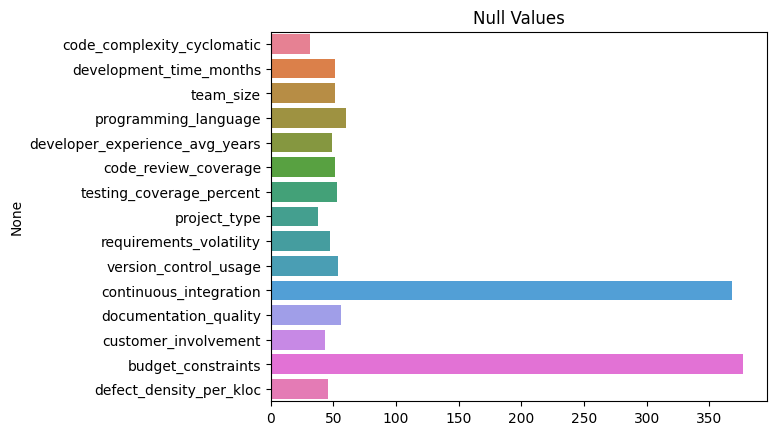

In [59]:
sns.barplot(x=df.isna().sum().values,y=df.isna().sum().index,hue=df.isna().sum().index)
plt.title("Null Values")
plt.show()

##Data Preprocessing and **Filling Null Values**

In [60]:
df.columns

Index(['code_complexity_cyclomatic', 'development_time_months', 'team_size',
       'programming_language', 'developer_experience_avg_years',
       'code_review_coverage', 'testing_coverage_percent', 'project_type',
       'requirements_volatility', 'version_control_usage',
       'continuous_integration', 'documentation_quality',
       'customer_involvement', 'budget_constraints',
       'defect_density_per_kloc'],
      dtype='object')

In [61]:

avg_annual_income=df['defect_density_per_kloc'].mean()
avg_annual_income

np.float64(5.103023265922431)

In [62]:
df['defect_density_per_kloc']=df['defect_density_per_kloc'].fillna(avg_annual_income)
df['defect_density_per_kloc'].isna().sum()

np.int64(0)

In [63]:
avr_outstading=df['defect_density_per_kloc'].mean()
avr_outstading

np.float64(5.103023265922431)

In [64]:

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
print("Missing values before:\n")
print(df.isnull().sum())


num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns


for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)


for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after:\n")
print(df.isnull().sum())


Missing values before:

code_complexity_cyclomatic         31
development_time_months            51
team_size                          51
programming_language               60
developer_experience_avg_years     49
code_review_coverage               51
testing_coverage_percent           53
project_type                       38
requirements_volatility            47
version_control_usage              54
continuous_integration            368
documentation_quality              56
customer_involvement               43
budget_constraints                377
defect_density_per_kloc             0
dtype: int64

Missing values after:

code_complexity_cyclomatic        0
development_time_months           0
team_size                         0
programming_language              0
developer_experience_avg_years    0
code_review_coverage              0
testing_coverage_percent          0
project_type                      0
requirements_volatility           0
version_control_usage             0
continuou

In [65]:
X = df.drop("defect_density_per_kloc", axis=1)
y = df["defect_density_per_kloc"]

In [66]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include="object").columns

print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: Index(['code_complexity_cyclomatic', 'development_time_months', 'team_size',
       'developer_experience_avg_years', 'code_review_coverage',
       'testing_coverage_percent'],
      dtype='object')
Categorical: Index(['programming_language', 'project_type', 'requirements_volatility',
       'version_control_usage', 'continuous_integration',
       'documentation_quality', 'customer_involvement', 'budget_constraints'],
      dtype='object')


#Graphs

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Graph Showing Credit Score With The Count !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


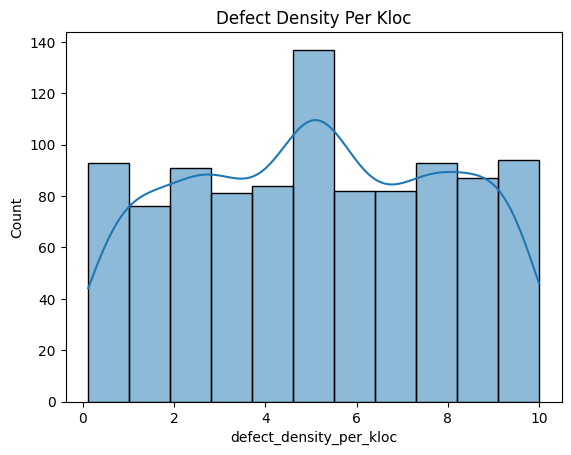

In [67]:
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Graph Showing Credit Score With The Count !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
sns.histplot(df['defect_density_per_kloc'],kde=True)
plt.title("Defect Density Per Kloc")
plt.show()

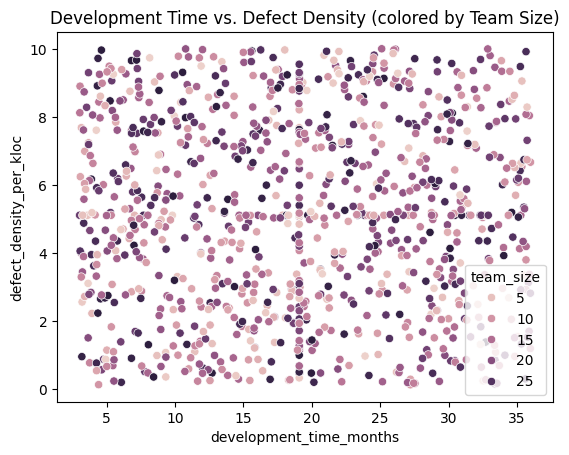

In [68]:
sns.scatterplot(x='development_time_months', y='defect_density_per_kloc', hue='team_size', data=df)
plt.title("Development Time vs. Defect Density (colored by Team Size)")
plt.show()

####################### Graph Showing Defect Density According To The Project Type #######################


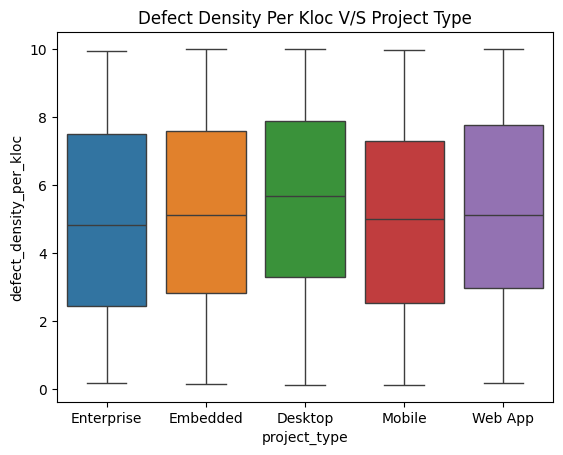

In [69]:
print("####################### Graph Showing Defect Density According To The Project Type #######################")
sns.boxplot(x='project_type', y='defect_density_per_kloc',hue='project_type', data=df)
plt.title("Defect Density Per Kloc V/S Project Type")
plt.show()

####################### Line Graph Of Defect Density With Respect To Requirements Volatility #######################


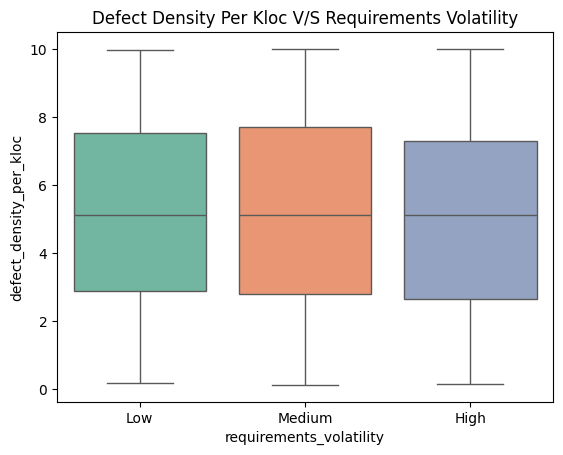

In [70]:
print("####################### Line Graph Of Defect Density With Respect To Requirements Volatility #######################")
sns.boxplot(x='requirements_volatility', y='defect_density_per_kloc',hue='requirements_volatility',data=df,palette='Set2',legend=False)
plt.title("Defect Density Per Kloc V/S Requirements Volatility")
plt.show()

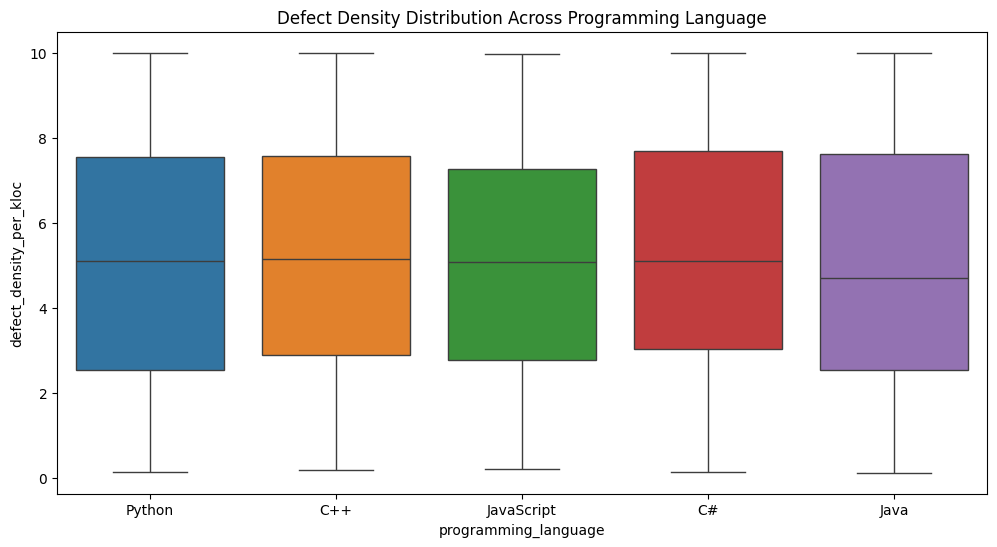

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='programming_language', y='defect_density_per_kloc',hue='programming_language',data=df)
plt.title("Defect Density Distribution Across Programming Language")
plt.show()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Graph Showing Count Of Project Types %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


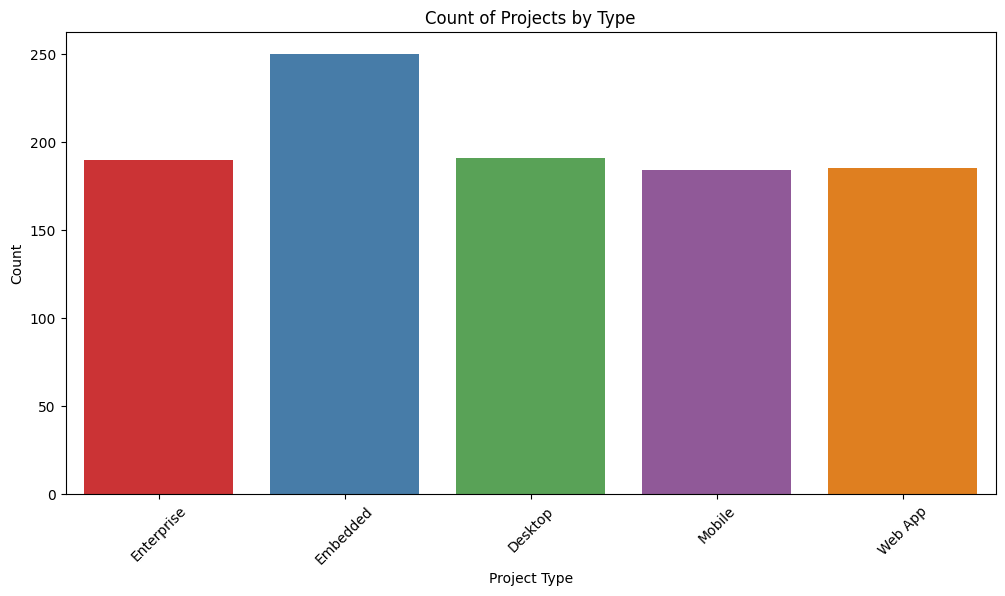

In [72]:
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Graph Showing Count Of Project Types %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
plt.figure(figsize=(12, 6))
sns.countplot(
    x='project_type',
    data=df,
    palette='Set1'
)
plt.xticks(rotation=45)
plt.title("Count of Projects by Type")
plt.xlabel("Project Type")
plt.ylabel("Count")
plt.show()

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ PieChart Of Project Type @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


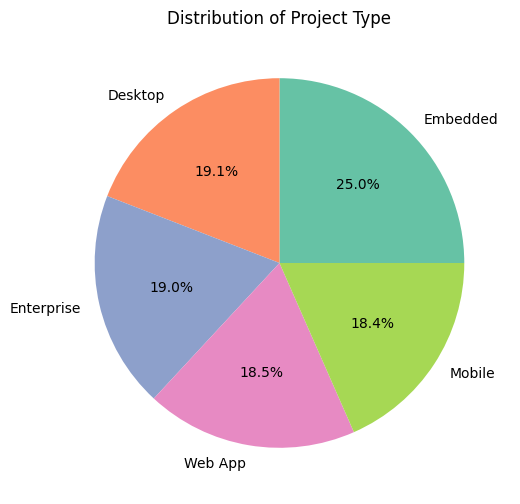

In [73]:
print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ PieChart Of Project Type @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
counts = df['project_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
plt.title('Distribution of Project Type')
plt.show()

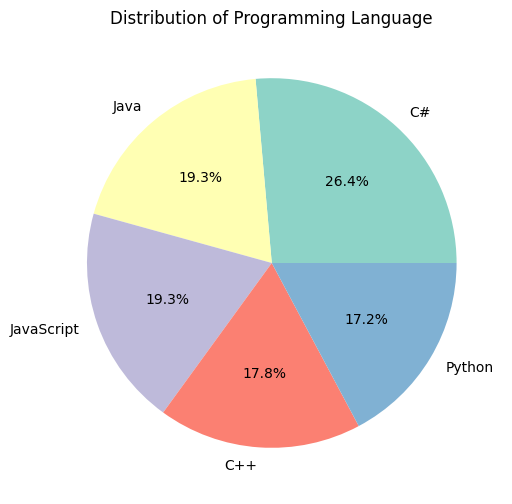

In [74]:
counts = df['programming_language'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Programming Language')
plt.show()

******************** Graph Showing Defect Density With Customer Involvement ********************


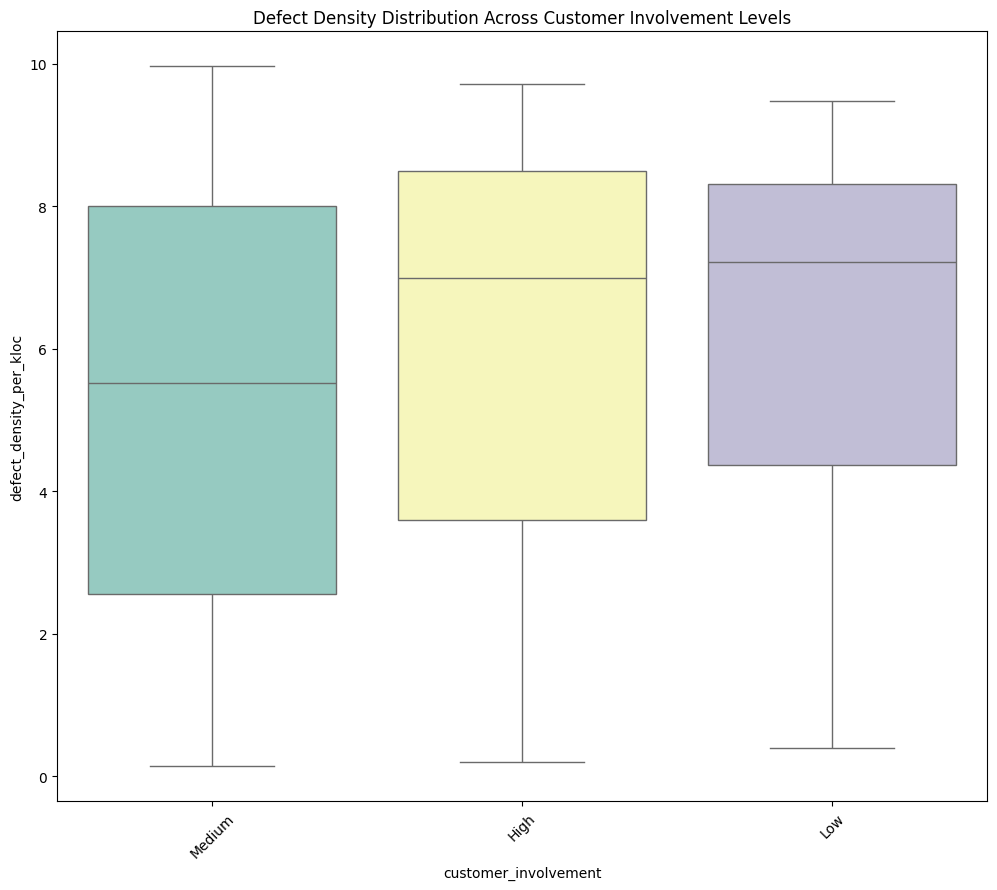

In [75]:
df_sample = df.sample(100, random_state=42)
print("******************** Graph Showing Defect Density With Customer Involvement ********************")
plt.figure(figsize=(12, 10))
sns.boxplot(
    x='customer_involvement',
    y='defect_density_per_kloc',
    hue='customer_involvement',
    data=df_sample,
    palette='Set3',
    legend=False
)
plt.xticks(rotation=45)
plt.title("Defect Density Distribution Across Customer Involvement Levels")
plt.show()

******************** Graph Showing Defect Density With Programming Language ********************


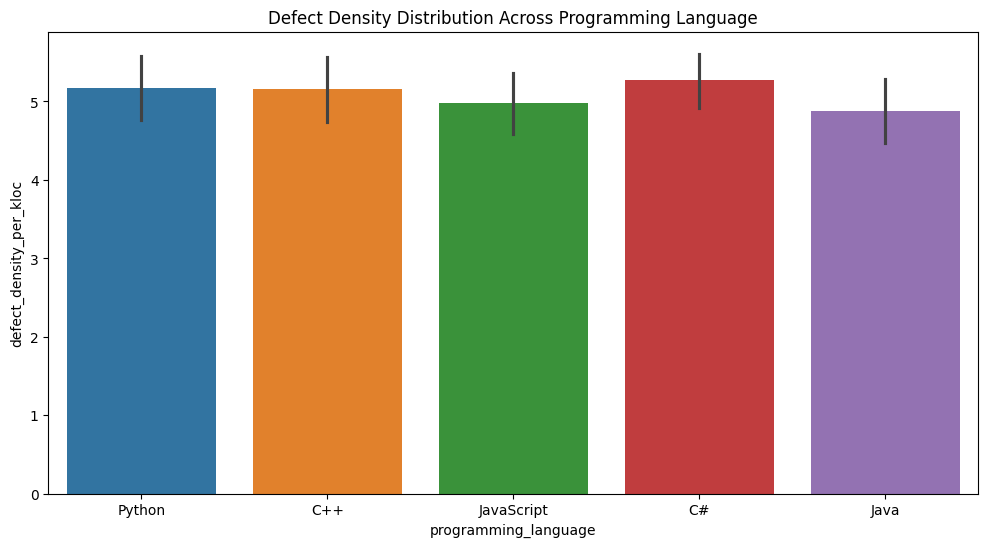

In [76]:
print("******************** Graph Showing Defect Density With Programming Language ********************")
plt.figure(figsize=(12, 6))
sns.barplot(x='programming_language', y='defect_density_per_kloc',hue='programming_language',data=df)
plt.title("Defect Density Distribution Across Programming Language")
plt.show()

***REGRESSION***

OLS

In [77]:
x=df.drop(['programming_language','project_type','requirements_volatility','version_control_usage','continuous_integration','documentation_quality','customer_involvement','budget_constraints','defect_density_per_kloc'],axis=1)
y=df['defect_density_per_kloc']

In [78]:
import statsmodels.api as sm

# Convert DataFrame and Series to NumPy arrays
x_np = x.values
y_np = y.values

# Add constant to the NumPy array
x_np = sm.add_constant(x_np)

# Fit the OLS model with NumPy arrays
model = sm.OLS(y_np, x_np).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.380
Date:                Tue, 17 Feb 2026   Prob (F-statistic):              0.219
Time:                        03:48:27   Log-Likelihood:                -2449.8
No. Observations:                1000   AIC:                             4914.
Df Residuals:                     993   BIC:                             4948.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0996      0.633      8.053      0.0

In [79]:
df1=pd.get_dummies(df)

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   code_complexity_cyclomatic       1000 non-null   float64
 1   development_time_months          1000 non-null   float64
 2   team_size                        1000 non-null   float64
 3   developer_experience_avg_years   1000 non-null   float64
 4   code_review_coverage             1000 non-null   float64
 5   testing_coverage_percent         1000 non-null   float64
 6   defect_density_per_kloc          1000 non-null   float64
 7   programming_language_C#          1000 non-null   bool   
 8   programming_language_C++         1000 non-null   bool   
 9   programming_language_Java        1000 non-null   bool   
 10  programming_language_JavaScript  1000 non-null   bool   
 11  programming_language_Python      1000 non-null   bool   
 12  project_type_Desktop 

In [81]:
for i in df1.columns:
  df1[i]=df1[i].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   code_complexity_cyclomatic       1000 non-null   float64
 1   development_time_months          1000 non-null   float64
 2   team_size                        1000 non-null   float64
 3   developer_experience_avg_years   1000 non-null   float64
 4   code_review_coverage             1000 non-null   float64
 5   testing_coverage_percent         1000 non-null   float64
 6   defect_density_per_kloc          1000 non-null   float64
 7   programming_language_C#          1000 non-null   float64
 8   programming_language_C++         1000 non-null   float64
 9   programming_language_Java        1000 non-null   float64
 10  programming_language_JavaScript  1000 non-null   float64
 11  programming_language_Python      1000 non-null   float64
 12  project_type_Desktop 

In [82]:
x=df1.drop("defect_density_per_kloc",axis=1)
y=df1["defect_density_per_kloc"]

In [83]:
import statsmodels.api as sm
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     defect_density_per_kloc   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.007
Method:                      Least Squares   F-statistic:                     1.294
Date:                     Tue, 17 Feb 2026   Prob (F-statistic):              0.152
Time:                             03:48:27   Log-Likelihood:                -2437.6
No. Observations:                     1000   AIC:                             4927.
Df Residuals:                          974   BIC:                             5055.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [84]:
print("Accuracy:",round(model.rsquared*100,4),"%")

Accuracy: 3.2143 %


***CLASSIFICATION USIG NEURAL NETWORK***

In [89]:
# Scale the data (VERY IMPORTANT for Neural Network)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train_res)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [90]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Create model
model = models.Sequential([

    layers.Input(shape=(X_train_scaled.shape[1],)),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')   # Binary classification output
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name="auc")]
)


In [91]:
# Early stopping to prevent overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train
history = model.fit(
    X_train_scaled,
    y_train_res,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4722 - auc: 0.4917 - loss: 0.7136 - val_accuracy: 0.4405 - val_auc: 0.5337 - val_loss: 0.7140
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5656 - auc: 0.6003 - loss: 0.6750 - val_accuracy: 0.5595 - val_auc: 0.5312 - val_loss: 0.6937
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5875 - auc: 0.6301 - loss: 0.6696 - val_accuracy: 0.4881 - val_auc: 0.5512 - val_loss: 0.6998
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6217 - auc: 0.6977 - loss: 0.6461 - val_accuracy: 0.5060 - val_auc: 0.5345 - val_loss: 0.7001
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6181 - auc: 0.6536 - loss: 0.6578 - val_accuracy: 0.5060 - val_auc: 0.5455 - val_loss: 0.7065
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6396 - auc: 0.6873 - loss: 0.6428 - val_accuracy: 0.5119 - val_auc: 0.5407 - val_loss: 0.7090
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

In [92]:
# Evaluate on test data
loss, accuracy, auc = model.evaluate(X_test_scaled, y_test)

print("\nTest Accuracy:", accuracy)
print("Test AUC:", auc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4912 - auc: 0.4792 - loss: 0.7029 

Test Accuracy: 0.5049999952316284
Test AUC: 0.5068671703338623


In [93]:
# Predict probabilities
y_pred_prob = model.predict(X_test_scaled)

# Convert probability → class
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.50      0.51       105
           1       0.48      0.52      0.50        95

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200

Confusion Matrix:

[[52 53]
 [46 49]]


#CLASSIFICATION USING ML (RANDOM FOREST)

In [96]:
threshold = df1["defect_density_per_kloc"].median()

df1["is_defective"] = (df1["defect_density_per_kloc"] > threshold).astype(int)

print("Class distribution:\n")
print(df1["is_defective"].value_counts())

Class distribution:

is_defective
0    525
1    475
Name: count, dtype: int64


In [97]:
X = df1.drop(["defect_density_per_kloc", "is_defective"], axis=1)
y = df1["is_defective"]

# Convert categorical → numeric
X = pd.get_dummies(X, drop_first=True)

print("\nFeature shape:", X.shape)


Feature shape: (1000, 33)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [99]:
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())


After SMOTE:
is_defective
1    420
0    420
Name: count, dtype: int64


In [100]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [101]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [102]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

In [103]:


print("\n==============================")
print("CLASSIFICATION REPORT")
print("==============================")

print(classification_report(y_test, y_pred))


print("\n==============================")
print("CONFUSION MATRIX")
print("==============================")

print(confusion_matrix(y_test, y_pred))


print("\n==============================")
print("ROC-AUC SCORE")
print("==============================")

print("ROC-AUC:", roc_auc_score(y_test, y_proba))


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       105
           1       0.47      0.39      0.43        95

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200


CONFUSION MATRIX
[[64 41]
 [58 37]]

ROC-AUC SCORE
ROC-AUC: 0.5006516290726817


In [104]:
importances = rf.feature_importances_

feat_imp = pd.Series(importances, index=X.columns)

feat_imp = feat_imp.sort_values(ascending=False)

print("\nTop 10 Important Features:\n")

print(feat_imp.head(10))



Top 10 Important Features:

code_complexity_cyclomatic        0.104963
code_review_coverage              0.100827
testing_coverage_percent          0.100011
development_time_months           0.098253
developer_experience_avg_years    0.097628
team_size                         0.086270
version_control_usage_Expert      0.018492
project_type_Desktop              0.017968
requirements_volatility_High      0.017066
customer_involvement_Low          0.016654
dtype: float64


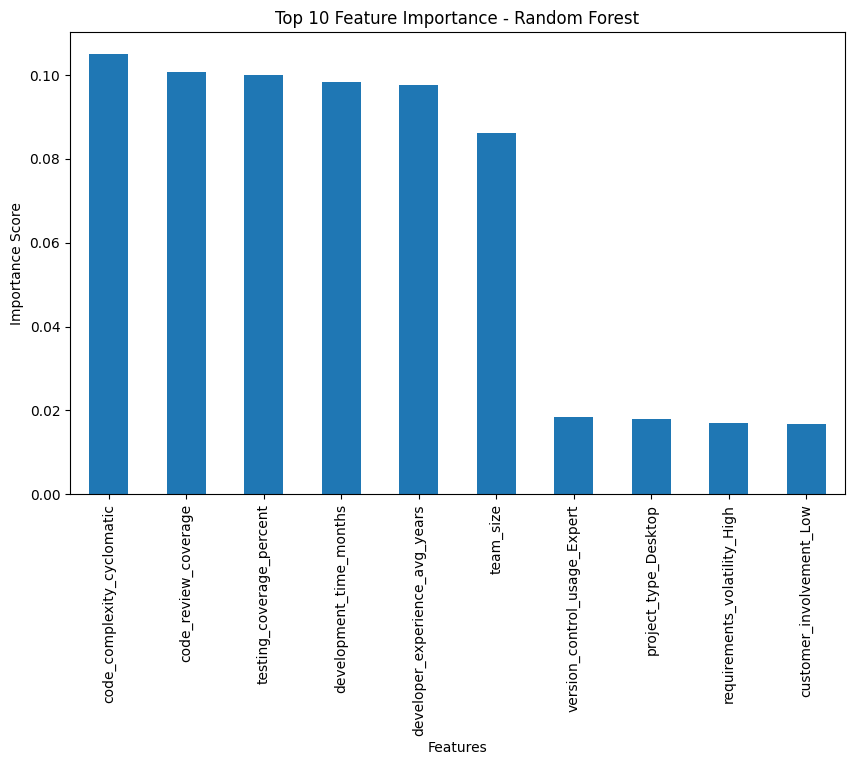

In [105]:
plt.figure(figsize=(10,6))

feat_imp.head(10).plot(kind="bar")

plt.title("Top 10 Feature Importance - Random Forest")

plt.xlabel("Features")

plt.ylabel("Importance Score")

plt.show()

Frontend Design

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   code_complexity_cyclomatic       1000 non-null   float64
 1   development_time_months          1000 non-null   float64
 2   team_size                        1000 non-null   float64
 3   developer_experience_avg_years   1000 non-null   float64
 4   code_review_coverage             1000 non-null   float64
 5   testing_coverage_percent         1000 non-null   float64
 6   defect_density_per_kloc          1000 non-null   float64
 7   programming_language_C#          1000 non-null   float64
 8   programming_language_C++         1000 non-null   float64
 9   programming_language_Java        1000 non-null   float64
 10  programming_language_JavaScript  1000 non-null   float64
 11  programming_language_Python      1000 non-null   float64
 12  project_type_Desktop 

In [113]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import joblib

X = df1.drop(["defect_density_per_kloc","is_defective"], axis=1)
y = df1["defect_density_per_kloc"]

# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X, y)

# Get Top 10 features
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

top10_features = feat_imp.head(10).index.tolist()

print("Top 10 Features:", top10_features)

# Train model using only top 10 features
rf_top10 = RandomForestRegressor(n_estimators=300, random_state=42)
rf_top10.fit(X[top10_features], y)

# Save model and feature list
joblib.dump(rf_top10, "rf_top10_model.pkl")
joblib.dump(top10_features, "top10_features.pkl")


Top 10 Features: ['code_review_coverage', 'testing_coverage_percent', 'developer_experience_avg_years', 'development_time_months', 'code_complexity_cyclomatic', 'team_size', 'project_type_Desktop', 'customer_involvement_Low', 'documentation_quality_Fair', 'programming_language_Java']


['top10_features.pkl']

In [115]:
import joblib

threshold = df1["defect_density_per_kloc"].median()

joblib.dump(threshold, "threshold.pkl")

['threshold.pkl']

In [118]:
import gradio as gr
import joblib
import pandas as pd

# Load model, features, and threshold
model = joblib.load("rf_top10_model.pkl")
top10_features = joblib.load("top10_features.pkl")
threshold = joblib.load("threshold.pkl")


# Create meaningful labels
def make_label(feature_name):
    return feature_name.replace("_", " ").title()


# Prediction function
def predict_defect_density(*inputs):

    # Map inputs to original feature names
    input_dict = dict(zip(top10_features, inputs))

    input_df = pd.DataFrame([input_dict])

    # Predict defect density
    prediction = model.predict(input_df)[0]

    # Classification
    classification = "DEFECTIVE" if prediction > threshold else "NON-DEFECTIVE"

    return (
        f"{prediction:.4f}",
        classification
    )


# Create input components with meaningful names
inputs = []

for feature in top10_features:

    inputs.append(

        gr.Number(

            label=make_label(feature),

            value=0

        )

    )


# Create Gradio interface
interface = gr.Interface(

    fn=predict_defect_density,

    inputs=inputs,

    outputs=[

        gr.Textbox(label="Predicted Defect Density per KLOC"),

        gr.Textbox(label="Classification Result")

    ],

    title=" Rajesh H M Software Defect Density Prediction System",

    description="Enter the software metrics to predict defect density and classify as DEFECTIVE or NON-DEFECTIVE"

)


# Launch app
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bfc8a497b5f1e412e3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [122]:
print(df1[df1['defect_density_per_kloc']==9.998667127])

    code_complexity_cyclomatic  development_time_months  team_size  \
92                    1.012802                25.111452       16.0   

    developer_experience_avg_years  code_review_coverage  \
92                        9.315442             58.559522   

    testing_coverage_percent  defect_density_per_kloc  \
92                 78.321197                 9.998667   

    programming_language_C#  programming_language_C++  \
92                      0.0                       0.0   

    programming_language_Java  ...  documentation_quality_Excellent  \
92                        1.0  ...                              1.0   

    documentation_quality_Fair  documentation_quality_Good  \
92                         0.0                         0.0   

    documentation_quality_Poor  customer_involvement_High  \
92                         0.0                        0.0   

    customer_involvement_Low  customer_involvement_Medium  \
92                       1.0                          0.

In [125]:
df1['project_type_Desktop'].mode()

,project_type_Desktop
0,0.0


Output:
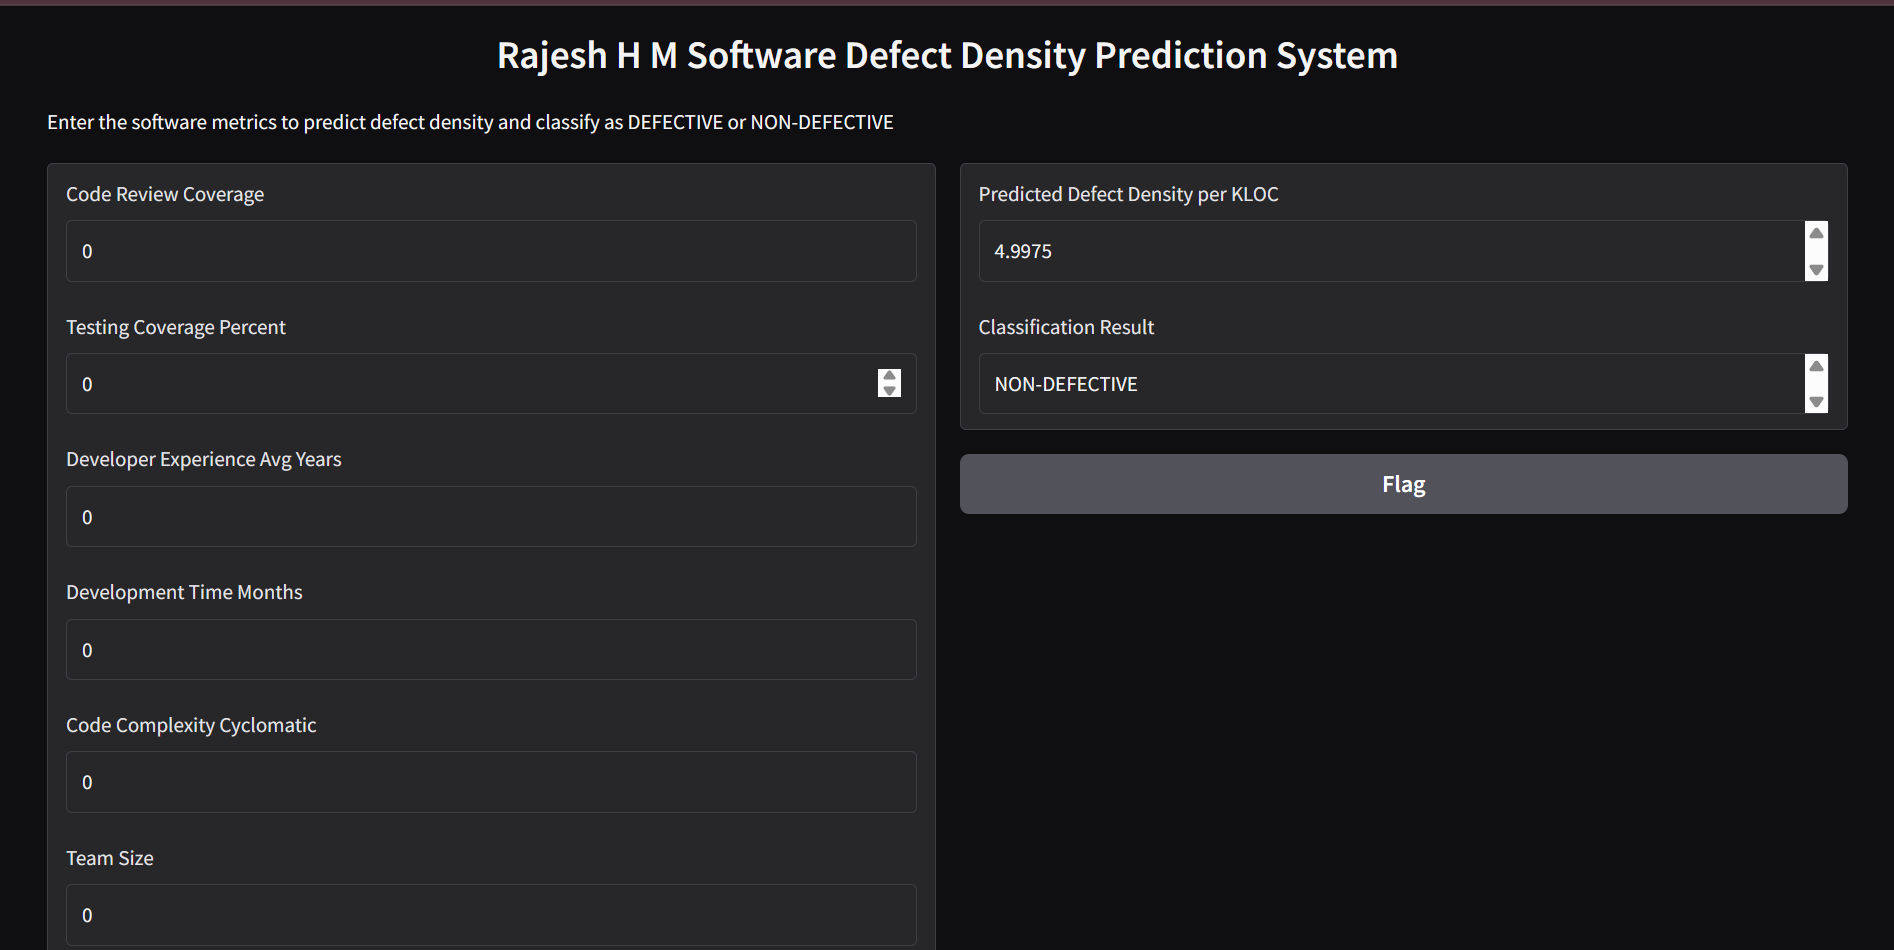